In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [3]:
from pandas import DataFrame 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.font_manager import FontProperties 

font = FontProperties(fname="/home/gezi/soft/simsunttc/msyh.ttf", size=12)  #size可不用指定

In [4]:
from IPython.display import Image

In [5]:
import gezi
from libgezi import utf82gbk, gbk2utf8

In [6]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS
 
flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/lijiaoshou/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic.5neg/epoch/', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic.5neg/epoch/model.cpkt-50-63750', '')
flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/bow.w2v/', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/bow.bak/epoch/model.cpkt-10-12750', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model.v0/bow.basic/', '')

#flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/keyword/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/keyword/model/rnn.lijiaoshou2/', '')

flags.DEFINE_string('seg_method_', 'basic', '')
flags.DEFINE_bool('feed_single_', True, '')

import gezi
import melt 
from deepiu.util import text2ids

import numpy as np

text2ids.init(FLAGS.vocab)

predictor = melt.Predictor(FLAGS.model_dir)

def predict(text, text2=None, topn=0):
  text = utf82gbk(text)
  timer = gezi.Timer()
  text_ids = text2ids.text2ids(text, FLAGS.seg_method_, feed_single=FLAGS.feed_single_, max_words=50)
  #print('text_ids', text_ids)
  
  if topn:
    #print(tf.get_default_graph().get_all_collection_keys())
    vocab = text2ids.vocab
    scores = predictor.inference('text_words_score', feed_dict = {'bow/main/text:0': [text_ids]})
    #scores = predictor.inference('text_words_emb_score', feed_dict = {'bow/main/text:0': [text_ids]})
    #print(scores)
    scores = scores[0]
    indexes = (-scores).argsort()[:topn]
    print(' '.join(['%s:%.6f'%(gbk2utf8(vocab.key(index)), scores[index]) for index in indexes]))
    return
    
  if text2 is not None:
    text2 = utf82gbk(text2)
    text2_ids = text2ids.text2ids(text2, FLAGS.seg_method_, feed_single=True)
    #score = predictor.inference(['text_emb_sim'], 
    score = predictor.inference(['textsim'], 
                                    feed_dict= {
                                      'bow/main/text:0': [text_ids],
                                      'bow/main/text2:0': [text2_ids]
                                      })
    print(score[0][0])
    return score[0][0]

  #print('words', words)
  argmax_encode = predictor.inference(['words_importance'], 
                                    feed_dict= {
                                      'bow/main/text:0': [text_ids]
                                      })
  print('argmax_encode', argmax_encode[0])

  argmax_encode = argmax_encode[0][0]
  argmax_encode = [max(x, 0) for x in argmax_encode]

  text_ids =  text2ids.text2ids(text, FLAGS.seg_method_, feed_single=FLAGS.feed_single_, append_start=False, append_end=False)
  words = text2ids.ids2words(text_ids)
    
  words = [gbk2utf8(x) for x in words]

  seq_len = 0
  for x in words:
  	if x != 0:
  		seq_len += 1
  	else:
  		break

  print(text_ids)

   # visualize model
  import matplotlib.pyplot as plt
  #argmaxs = [np.sum((argmax_encode==k)) for k in range(seq_len)]
  argmaxs = argmax_encode[:seq_len]
  print('argmaxs', argmaxs, np.sum(argmaxs), seq_len)
  x = range(len(argmaxs))
  total = sum([x for x in argmaxs if x > 0])
  y = [100.0*n/total for n in argmaxs]
  #print(words, y)
  print(gbk2utf8(text))
  
  #for word, score in zip(words, y):
  #  print(word, score)
  
  fig = plt.figure()
  
  #words = [x.decode('utf8') for x in words]
  #words = [i for i in range(len(words))]

  #plt.xticks(x, words, rotation=45)
  #plt.bar(x, y)
  #plt.ylabel('%')
  #plt.title('Visualisation of words importance')

  df = DataFrame({"%":y}, index=words) 
  ax = df.plot(kind = 'bar', rot = 90) 
  labels = [label.decode("utf-8") for label in df.index.values] 
  ax.set_xticklabels(labels, fontproperties=font) 
    
  #zhfont1 = matplotlib.font_manager.FontProperties(fname='/home/gezi/soft/simsunttc/msyh.ttf')
  #plt.xlabel('性别',fontproperties=zhfont1)
  #plt.ylabel('人数',fontproperties=zhfont1)
  #plt.xticks( (0,1),('男','女') ,fontproperties=zhfont1)
  #plt.bar(left=(0,1), height=(1,0.5), width=0.35)
  
  plt.title('Visualisation of words importance')
  #plt.title('句子词汇重要度')
  plt.show()

tensorflow_version: 1.2.0-rc0
ENCODE_UNK 1
restore from /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.w2v/model.ckpt-224.3-286000


INFO:tensorflow:Restoring parameters from /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.w2v/model.ckpt-224.3-286000


import graph ok /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.w2v/model.ckpt-224.3-286000.meta
restore ok /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.w2v/model.ckpt-224.3-286000


In [7]:
def top_words(text, topn=100):
  return predict(text, topn=topn)

In [8]:
top_words('高铁')
top_words('美女')

铁:0.854102 动车:0.372879 高:0.358723 13805194935:0.315626 威马:0.310425 大亚湾:0.279751 通票:0.261321 既然:0.258392 整洁:0.253220 未央:0.251111 占:0.246813 明火:0.244592 毫升:0.242861 乘务:0.242690 座:0.237763 展博:0.236252 跳水:0.236242 香溪:0.234309 华大:0.233555 钢轨:0.233311 印象:0.232340 加2:0.231866 想飞:0.231669 面馆:0.230936 6900:0.230295 处:0.230182 李沧:0.229033 天禧:0.227730 洪:0.226879 放松:0.226871 亩:0.225513 仙林:0.225113 蛳:0.225053 现购:0.224080 长岛:0.223638 起价:0.223345 新城:0.222195 金贝:0.222179 府邸:0.222125 整改:0.221759 单价:0.220625 汇福:0.220556 197:0.219407 接送:0.219164 鸿福:0.218912 网架:0.218909 b2:0.218795 重质:0.218461 中洲:0.218422 锁住:0.218116 豪瑞:0.217831 置业:0.217335 双高:0.216982 富力:0.216379 箍筋:0.215766 永源:0.215502 麦卡仑:0.215423 毂:0.215169 达康:0.215001 直男:0.214924 光谷:0.214839 铜棒:0.214446 i:0.214134 井队:0.213081 班车:0.213043 科勒:0.213001 万科:0.212587 25000:0.212128 pe管:0.212122 福运达:0.211726 渭南:0.211201 皮革:0.211056 堰:0.210674 young:0.210560 09:0.210330 水岸:0.209239 授予:0.209116 中美:0.208637 三宝:0.208630 烧饭:0.208514 8100:0.208202 iht:0.207892 贵重

In [9]:
top_words('墨镜')

墨镜:1.000000 黄皮:0.335483 气场:0.332464 轻便:0.327947 受潮:0.322014 脸蛋:0.321981 柑:0.316067 色斑:0.315289 粉底:0.313578 人手:0.310449 轻盈:0.307996 皮靴:0.306906 长腿:0.303083 普茶:0.299681 loho:0.296139 血剑:0.294135 干枯:0.292724 宰:0.291041 东西:0.285204 镜片:0.284611 轻薄:0.283901 谨记:0.283788 渐变:0.283706 手机:0.282905 村:0.282569 镜架:0.282381 绞股蓝:0.281024 麽:0.279908 珍惜:0.279902 审核:0.277087 水嫩:0.276861 茶叶:0.273030 古风:0.270651 钱包:0.270046 air:0.268474 杏花:0.268261 艰辛:0.267772 降价:0.267387 小气:0.267320 春光:0.267272 开车:0.266309 换季:0.265929 洁面:0.265159 个子:0.264399 蓝花:0.263415 伴侣:0.262962 易:0.262590 季节:0.262517 富人:0.261853 圆珠:0.260432 顾虑:0.260363 好车:0.259298 脸部:0.258778 过敏:0.257602 送亲:0.257327 送友:0.257158 笑:0.257136 手包:0.256813 黍:0.255902 弥:0.255635 必备:0.255010 app:0.254682 大幅:0.254653 飘:0.253830 瞅:0.253198 清仓:0.251907 239:0.251848 上身:0.250697 想说:0.250655 开水:0.250593 划痕:0.249792 债:0.249641 失灵:0.249409 触控:0.249076 三泰:0.248964 住所:0.247898 秀发:0.247705 海参:0.247664 男士:0.247498 太阳:0.247301 副:0.247187 就会:0.246308 纯银:0.245991 狐狸:0.24499

In [10]:
predict('美女', '美女')
predict('帅哥戴墨镜', '帅哥')
predict('帅哥戴墨镜', '墨镜')

[ 1.00000024]
[ 0.50493014]
[ 0.51683038]


array([ 0.51683038], dtype=float32)

argmax_encode [[ 1.00000024  0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.        ]]
[1311, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [1.0000002] 1.0 1
美女


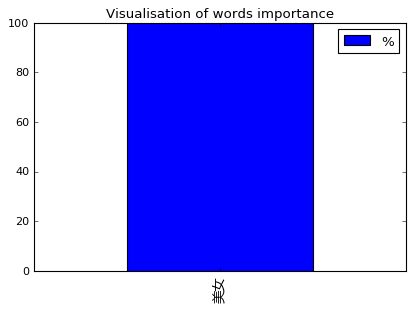

argmax_encode [[ 0.50493014  0.58488429  0.51683038  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.        ]]
[6829, 1355, 12429, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.50493014, 0.58488429, 0.51683038] 1.60664 3
帅哥戴墨镜


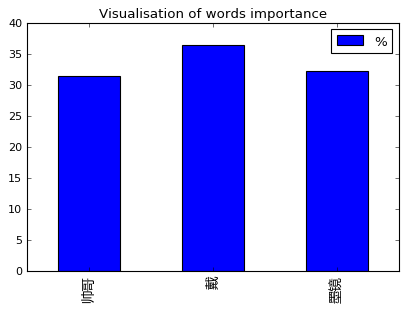

argmax_encode [[ 0.27998823  0.50328362  0.03244842  0.09800459  0.05234707  0.4560715
   0.03037078  0.11108728  0.26858893  0.03037078  0.37380666  0.16600323
   0.03037078  0.13902044  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[3935, 640, 5, 80, 1321, 508, 3, 34, 269, 3, 2239, 25, 3, 1407, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.27998823, 0.50328362, 0.032448418, 0.098004594, 0.052347071, 0.4560715, 0.030370776, 0.11108728, 0.26858893, 0.030370776, 0.37380666, 0.16600323, 0.030370776, 0.13902044] 2.57176 14
初中孩子的免费精品课，用手机，在家上，省心


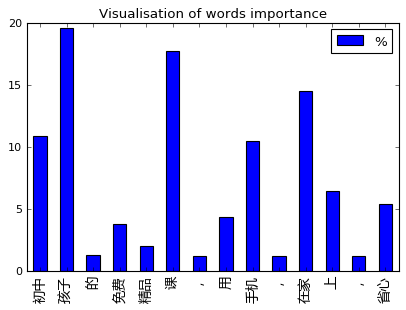

argmax_encode [[ 0.10407427  0.23495996  0.31413406  0.30723879  0.14397441  0.33842105
   0.20092969  0.39980668 -0.05554648  0.22631848  0.1128739   0.13874583
   0.22247997  0.33842105  0.09733681  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[17, 34, 1393, 324, 29, 199, 41, 7663, 3, 993, 269, 712, 56, 199, 1362, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.10407427, 0.23495996, 0.31413406, 0.30723879, 0.14397441, 0.33842105, 0.20092969, 0.39980668, 0, 0.22631848, 0.1128739, 0.13874583, 0.22247997, 0.33842105, 0.097336814] 3.17971493304 15
好用颜值高才是王道，这些手机现在买才实惠


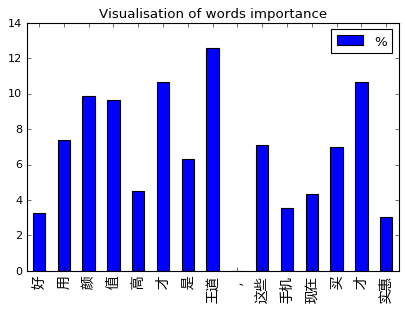

In [11]:
predict('美女')
predict('帅哥戴墨镜')
predict('初中孩子的免费精品课，用手机，在家上，省心')
predict('好用颜值高才是王道，这些手机现在买才实惠')

argmax_encode [[ 0.12540345  0.41915905  0.34733069  0.29838556  0.03786259  0.24275395
  -0.04577759  0.04700825  0.52129579  0.32270956  0.17340812  0.31608278
   0.16221672 -0.06025586  0.09763834  0.24416584  0.43465492  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[243, 350, 116, 1598, 135, 1401, 6, 18, 1208, 200, 878, 402, 365, 43, 579, 46, 428, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.12540345, 0.41915905, 0.34733069, 0.29838556, 0.037862591, 0.24275395, 0, 0.047008254, 0.52129579, 0.32270956, 0.17340812, 0.31608278, 0.16221672, 0, 0.097638339, 0.24416584, 0.43465492] 3.79007561505 17
比信用卡分期更划算！

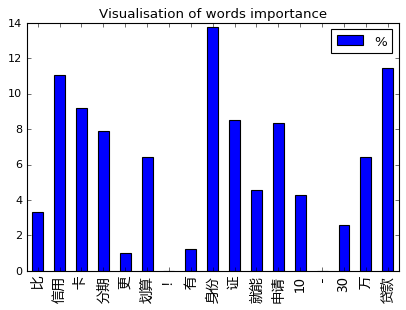

argmax_encode [[ 0.10595627  0.07210365  0.44732469  0.32556596  0.48360166  0.10157005
   0.14046052 -0.03072189  0.15445177 -0.02054678  0.08151819  0.01134841
   0.13538386  0.04633553  0.07598638  0.05552664 -0.05957454  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[4, 16, 4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.10595627, 0.072103649, 0.44732469, 0.32556596, 0.48360166, 0.10157005, 0.14046052, 0, 0.15445177, 0, 0.081518188, 0.011348414, 0.13538386, 0.04633553, 0.075986378, 0.05552664, 0] 2.23713359516 17
1890元往返飞旧金山?真是赚了,我一直在这里买

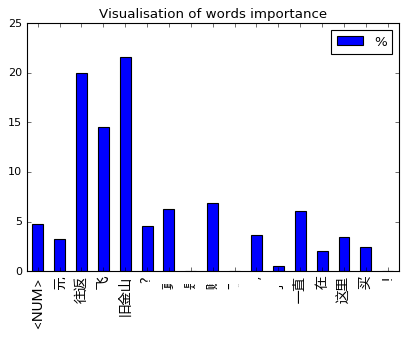

argmax_encode [[ 0.08462089  0.1799702   0.11190207  0.40105316  0.43217847  0.19224824
   0.34834316 -0.03381424  0.33379966  0.43323246  0.36481428  0.04697616
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[14, 199, 41, 976, 620, 100, 844, 5, 3709, 4480, 2260, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.084620886, 0.1799702, 0.11190207, 0.40105316, 0.43217847, 0.19224824, 0.34834316, 0, 0.33379966, 0.43323246, 0.36481428, 0.046976164] 2.92913875729 12
这才是上班族修本科的正确打开方式！


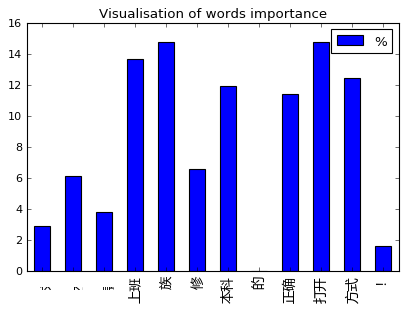

In [12]:
predict('比信用卡分期更划算！有身份证就能申请10-30万贷款')
predict('1890元往返飞旧金山?真是赚了,我一直在这里买!')
predict('这才是上班族修本科的正确打开方式！')

argmax_encode [[ 0.01485023  0.0621216   0.08522464 -0.02041308 -0.11414172  0.43128473
   0.40508932  0.04222972  0.02810366  0.12900695  0.53427649  0.03954208
   0.10500638  0.3621819   0.25274256  0.34383142  0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[19589, 36, 737, 8, 74, 626, 852, 245, 7, 993, 5404, 340, 12, 9771, 12322, 6140, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.014850233, 0.062121604, 0.085224643, 0, 0, 0.43128473, 0.40508932, 0.042229716, 0.028103665, 0.12900695, 0.53427649, 0.039542079, 0.10500638, 0.3621819, 0.25274256, 0.34383142] 2.83549168333 16
国庆到成都不要住酒店啦,这些民宿带你领略

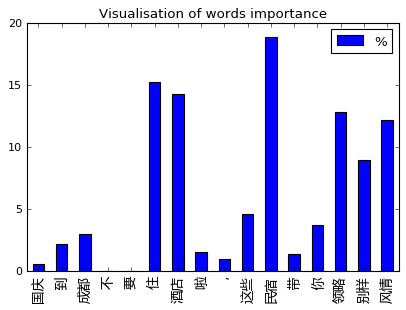

argmax_encode [[ 0.66696543  0.25709215  0.22964405  0.09264399  0.10679623  0.12013067
   0.66696543  0.3019464   0.42320698  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[8145, 39, 269, 133, 8, 256, 8145, 33, 478, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.66696543, 0.25709215, 0.22964405, 0.092643991, 0.10679623, 0.12013067, 0.66696543, 0.3019464, 0.42320698] 2.86539 9
低头玩手机?不如低头学英语


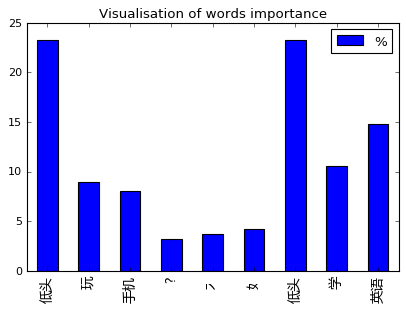

argmax_encode [[ 0.26126504 -0.01222587  0.14669159  0.33729893  0.11432958  0.09253484
   0.11504156  0.174647    0.02736982 -0.0287444   0.03137678  0.08831491
  -0.01222587  0.17372908  0.15368956  0.05119077  0.09602882  0.00266247
  -0.03165264  0.14987728  0.29177049  0.1311042  -0.0287444   0.16931549
   0.05461737 -0.0178581   0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]]
[6829, 6, 1277, 2671, 15, 59, 341, 2532, 87, 18, 400, 529, 6, 49, 378, 78, 58, 172, 21, 3697, 5718, 542, 18, 1262, 2511, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.26126504, 0, 0.14669159, 0.33729893, 0.11432958, 0.09253484, 0.11504156, 0.174647, 0.027369816, 0, 0.031376779, 0.088314906, 0, 0.17372908, 0.15368956, 0.051190771, 0.09602882, 0.00266

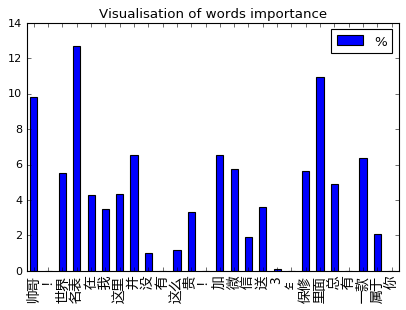

argmax_encode [[ 0.03378578  0.56578469  0.0419034   0.17302519  0.0419034   0.66444516
   0.24529377  0.09772493  0.52714694  0.0933429   0.03327976  0.65552497
   0.11642557  0.15119269  0.03998223  0.66444516 -0.08356434  0.41582969
   0.07132241  0.43021882  0.52714694  0.09155176  0.25201511  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[2520, 1741, 11, 218, 11, 478, 2583, 885, 508, 7, 136, 640, 3755, 279, 25, 478, 20, 4884, 16, 1777, 508, 80, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.033785775, 0.56578469, 0.041903403, 0.17302519, 0.041903403, 0.66444516, 0.24529377, 0.097724929, 0.52714694, 0.0933429, 0.033279758, 0.65552497, 0.11642557, 0.15119269, 0.039982233, 0.66444516,

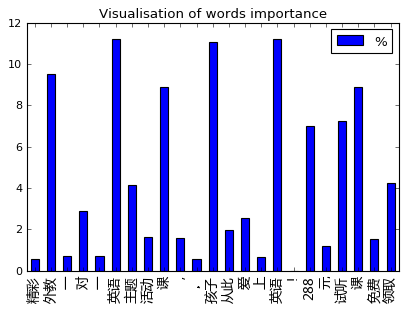

In [13]:
predict('国庆到成都不要住酒店啦,这些民宿带你领略别样风情')
predict('低头玩手机?不如低头学英语')
predict('帅哥！世界名表在我这里并没有这么贵！加微信送3年保修里面总有一款属于你')
predict('精彩外教一对一英语主题活动课,让孩子从此爱上英语!288元试听课免费领取')

argmax_encode [[ 0.26199058  0.13018674  0.33723322  0.07342786  0.18008909  0.00885281
   0.33723322  0.35932308  0.14833397  0.16023214  0.08923201  0.10597683
   0.03200896  0.02743633 -0.04792597 -0.03757011  0.03829944  0.03127646
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[2280, 4880, 33, 90, 1294, 133, 33, 2193, 328, 942, 7, 612, 36, 163, 27, 8, 978, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.26199058, 0.13018674, 0.33723322, 0.073427863, 0.18008909, 0.0088528059, 0.33723322, 0.35932308, 0.14833397, 0.16023214, 0.089232013, 0.10597683, 0.032008965, 0.027436335, 0, 0, 0.038299441, 0.031276457] 2.321

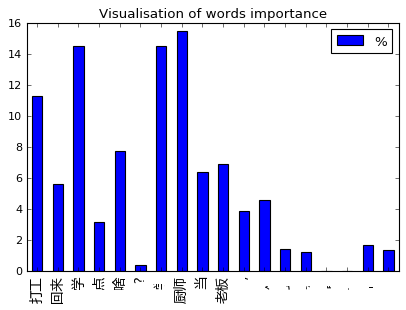

argmax_encode [[ 0.50226164  0.37630752  0.13416231  0.20376942  0.29831827  0.44064611
   0.13416231  0.44737524  0.31254333  0.33280477  0.02532839  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.50226164, 0.37630752, 0.13416231, 0.20376942, 0.29831827, 0.44064611, 0.13416231, 0.44737524, 0.31254333, 0.33280477, 0.025328392] 3.20768 11
水饺加盟,无需厨师,总部扶持创业!


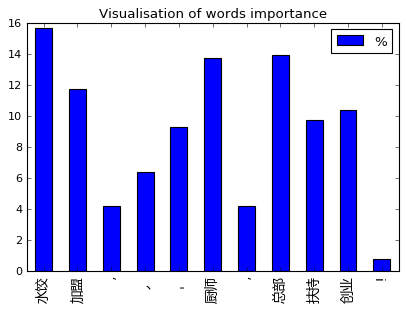

argmax_encode [[ 0.51416302  0.3815957   0.10954797  0.22042528  0.30154163  0.44729608
   0.10954797  0.46179169  0.32470465  0.32817268  0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.51416302, 0.3815957, 0.10954797, 0.22042528, 0.30154163, 0.44729608, 0.10954797, 0.46179169, 0.32470465, 0.32817268] 3.19879 10
水饺加盟,无需厨师,总部扶持创业


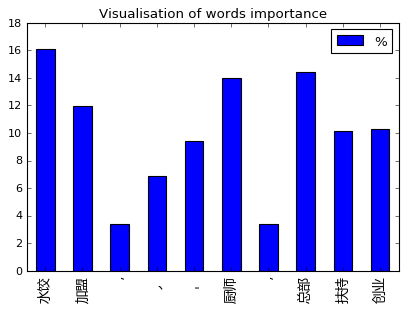

In [14]:
predict('打工回来学点啥?学厨师当老板,走到哪都不怕！')
predict('水饺加盟,无需厨师,总部扶持创业!')
predict('水饺加盟,无需厨师,总部扶持创业')

argmax_encode [[ 0.30720687  0.38055247  0.27678517  0.19058679  0.07197033  0.29923773
   0.07808006  0.13354407  0.23166101  0.00608902  0.35563809  0.0482446
   0.01669995  0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[1434, 4062, 1992, 303, 29, 695, 115, 52, 676, 38, 1386, 9, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.30720687, 0.38055247, 0.27678517, 0.19058679, 0.071970329, 0.29923773, 0.078080058, 0.13354407, 0.23166101, 0.0060890219, 0.35563809, 0.048244596, 0.016699951] 2.3963 13
iPhone隐藏功能：高铁也能在线选座了！


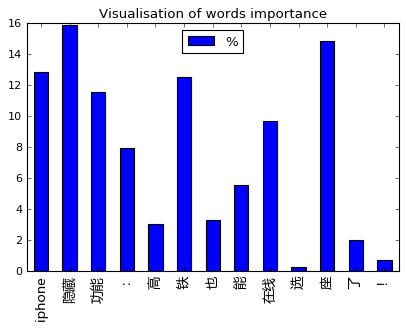

In [15]:
predict('iPhone隐藏功能：高铁也能在线选座了！')

In [16]:
predict('iPhone隐藏功能：高铁也能在线选座了！', 'iPhone')

[ 0.30720687]


array([ 0.30720687], dtype=float32)

In [17]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '高铁')

[ 0.31787828]


array([ 0.31787828], dtype=float32)

In [18]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '选座')

[ 0.33010864]


array([ 0.33010864], dtype=float32)

In [19]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '高铁选座')

[ 0.47036043]


array([ 0.47036043], dtype=float32)

argmax_encode [[ 0.29404104  0.42812729  0.21729308  0.50137812  0.40680906 -0.08091781
   0.41082114  0.23919016  0.0366356   0.23481356 -0.08091781  0.12068278
   0.39025974  0.16034424  0.0246975   0.50137812  0.18757933  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[4447, 7542, 9634, 2835, 8124, 7, 9771, 3086, 5, 3612, 7, 136, 7808, 3254, 25, 2835, 5341, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.29404104, 0.42812729, 0.21729308, 0.50137812, 0.40680906, 0, 0.41082114, 0.23919016, 0.036635604, 0.23481356, 0, 0.12068278, 0.39025974, 0.16034424, 0.024697501, 0.50137812, 0.18757933] 4.15405076742 17
携手欧歌

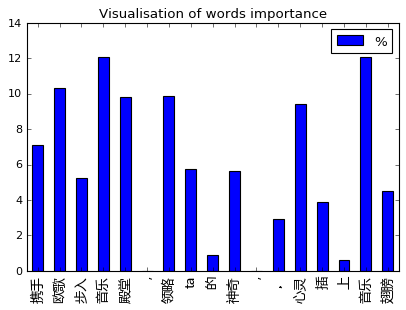

In [20]:
predict('携手欧歌步入音乐殿堂,领略ta的神奇,让心灵插上音乐翅膀')

argmax_encode [[ 0.51334691  0.5871914   0.10548303  0.40615582  0.35614026  0.26879057
   0.0467713   0.06723527  0.06263356  0.06723527  0.5871914   0.26879057
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[8854, 2277, 583, 3581, 852, 197, 7, 11, 218, 11, 2277, 197, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.51334691, 0.5871914, 0.10548303, 0.40615582, 0.35614026, 0.26879057, 0.046771303, 0.067235269, 0.062633559, 0.067235269, 0.5871914, 0.26879057] 3.33697 12
巨人游泳五星级酒店培训,一对一游泳培训


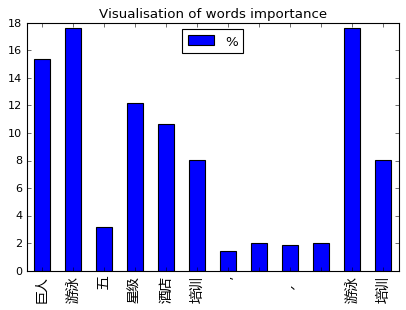

In [21]:
predict('巨人游泳五星级酒店培训,一对一游泳培训')

argmax_encode [[ 0.47724128  0.35732242  0.45962965  0.10229771  0.17615628 -0.03069699
   0.15461235 -0.00406092  0.12204219  0.04954123  0.13407633  0.07548334
   0.08388989  0.06784261 -0.04805616  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.47724128, 0.35732242, 0.45962965, 0.10229771, 0.17615628, 0, 0.15461235, 0, 0.12204219, 0.049541228, 0.13407633, 0.075483337, 0.083889887, 0.06784261, 0] 2.26013527811 15
往返飞旧金山?真是赚了,我一直在这里买!


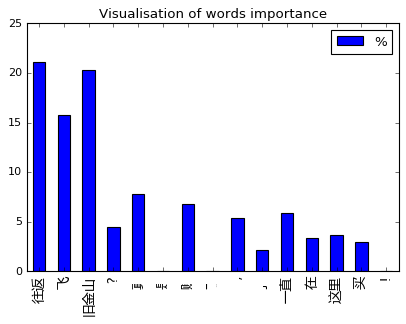

In [22]:
predict('往返飞旧金山?真是赚了,我一直在这里买!')

argmax_encode [[ 0.04046526 -0.01322622  0.58879024  0.50163007  0.04013713  0.17833272
   0.03077646  0.69572365  0.17180151  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[8, 74, 626, 852, 3, 341, 5, 5404, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.040465262, 0, 0.58879024, 0.50163007, 0.040137134, 0.17833272, 0.030776458, 0.69572365, 0.17180151] 2.24765703641 9
不要住酒店，这里的民宿好


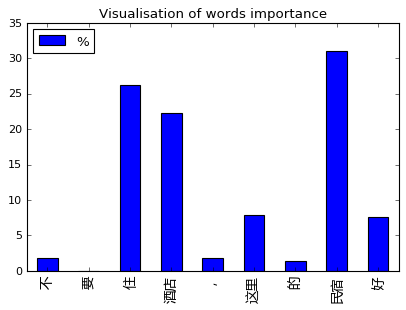

In [23]:
predict('不要住酒店，这里的民宿好')

argmax_encode [[ 0.04046525 -0.01322624  0.5887903   0.69572371  0.04013711  0.17833272
   0.03077645  0.50163007  0.17180151  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[8, 74, 626, 5404, 3, 341, 5, 852, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.040465254, 0, 0.5887903, 0.69572371, 0.040137108, 0.17833272, 0.03077645, 0.50163007, 0.17180151] 2.24765711464 9
不要住民宿，这里的酒店好


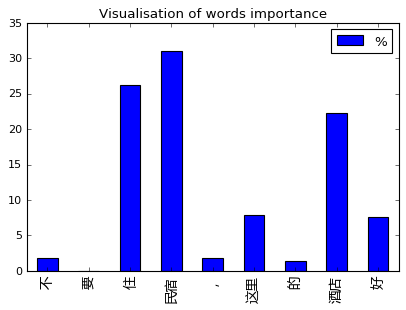

In [24]:
predict('不要住民宿，这里的酒店好')

argmax_encode [[ 0.19058694  0.24980879  0.28637022  0.20156787  0.42260036 -0.06193534
   0.04308614  0.1866513   0.12054981  0.09367281  0.15167594 -0.06193534
   0.31325284  0.09779951  0.08894995  0.28411514  0.14562865  0.09367281
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[247, 189, 4845, 2881, 12429, 3, 417, 52, 175, 9, 401, 3, 1072, 174, 23, 6114, 556, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.19058694, 0.24980879, 0.28637022, 0.20156787, 0.42260036, 0, 0.043086141, 0.1866513, 0.12054981, 0.093672812, 0.15167594, 0, 0.31325284, 0.09779951, 0.088949949, 0.28411514, 0.14562865, 0.093672812] 2.96998

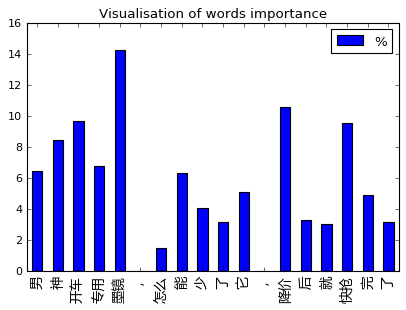

In [25]:
predict('男神开车专用墨镜，怎么能少了它，降价后就快抢完了')

argmax_encode [[ 0.01048906  0.09396232  0.33947054  0.29575592  0.39514473  0.30223733
   0.16304053 -0.01936458 -0.01796501  0.16490868  0.09889843  0.09396232
   0.29424161  0.17907055  0.23686174  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[59, 5, 22092, 5705, 3781, 914, 326, 7, 38, 1262, 1553, 5, 12429, 343, 1826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.01048906, 0.093962319, 0.33947054, 0.29575592, 0.39514473, 0.30223733, 0.16304053, 0, 0, 0.16490868, 0.098898426, 0.093962319, 0.29424161, 0.17907055, 0.23686174] 2.66804374568 15
我的家乡惠州越来越热,选一款喜欢的墨镜很重要


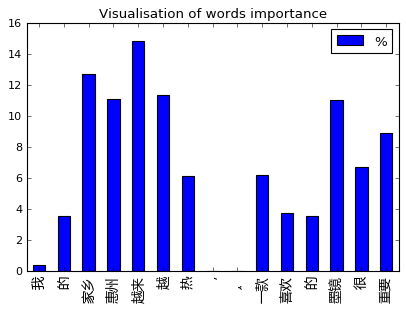

In [26]:
predict('我的家乡惠州越来越热,选一款喜欢的墨镜很重要')

In [27]:
predict('选一款喜欢的墨镜很重要,我的家乡惠州越来越热', '我的家乡惠州越来越热')

[ 0.67924821]


array([ 0.67924821], dtype=float32)

In [28]:
predict('选一款喜欢的墨镜很重要,我的家乡惠州越来越热', '选一款喜欢的墨镜很重要')

[ 0.55748415]


array([ 0.55748415], dtype=float32)

In [29]:
predict('我的家乡惠州越来越热,选一款喜欢的墨镜很重要', '选一款喜欢的墨镜很重要')

[ 0.55748409]


array([ 0.55748409], dtype=float32)

In [30]:
top_words('往返')

往返:1.000000 套票:0.565521 1900:0.487856 单程:0.466153 机票:0.430820 旧金山:0.400178 旅游:0.395633 护照:0.390821 5288:0.386796 旅行:0.386702 出发:0.386011 清迈:0.384759 488:0.377383 拱:0.374886 曼谷:0.372455 国航:0.369272 出团:0.365887 5999:0.365861 1080:0.359954 中青旅:0.353625 芭提雅:0.352503 南湖:0.349787 游:0.349780 双十:0.348356 爬坡:0.345352 160:0.339167 飞:0.338743 想飞:0.335804 海岛:0.332558 国旅:0.330410 跳水:0.328007 新山:0.326415 双城:0.326134 洋服:0.326064 洛杉矶:0.323502 东京:0.322466 古镇:0.319826 直飞:0.318487 越南:0.318150 普吉:0.316330 行程:0.314232 1350:0.313887 西藏:0.313355 遨游:0.308095 季节:0.306722 景点:0.306381 邮轮:0.306102 澳门:0.304349 九寨沟:0.303422 2199:0.301018 帆船:0.300949 华盛顿:0.299501 几十:0.299235 新加坡:0.299070 直达:0.297915 出境:0.296915 航线:0.296593 1999:0.296505 签证:0.295718 海景:0.295147 专列:0.293240 错峰:0.293126 加州:0.292390 勿入:0.291980 咫尺:0.290129 388:0.289653 wuli:0.289513 桂林:0.289216 c1:0.289190 设有:0.288912 甲米:0.288098 泰国:0.282636 新盘:0.282441 布吉:0.282185 到处:0.282066 安提瓜:0.282019 滦州:0.279544 穷游:0.279524 畅游:0.278469 迪斯尼:0.278101 艰辛:0.277416 一年制

In [31]:
top_words('民宿')

民宿:1.000000 收买:0.427841 格雷斯:0.425831 住:0.420719 旅馆:0.418280 平谷:0.414591 订房:0.412855 公寓:0.405758 尾盘:0.378801 酒店:0.367020 大鹏:0.363836 芭提雅:0.360388 滦州:0.358745 讨论:0.354652 梵高:0.345841 5300:0.340978 23000:0.340504 一隅:0.336741 房:0.336079 金翔:0.334606 客栈:0.332688 开往:0.329286 芳香:0.328635 选房:0.328331 房子:0.327342 万汇:0.324132 loft:0.323422 优游:0.322537 古城:0.322092 效劳:0.321814 107:0.321779 暖冬:0.321643 小城:0.321330 正序:0.319524 银滩:0.319420 两居:0.318187 租房:0.317713 置业:0.317161 遨游:0.316546 主城:0.315998 连绵:0.313910 偷闲:0.312781 中房:0.312475 府邸:0.311863 御园:0.311821 查找:0.311651 8100:0.311337 东京:0.310212 订:0.310032 375:0.309254 间:0.308404 airbnb:0.307528 泳池:0.306286 归巢:0.305833 旅行:0.305728 歇:0.304823 途:0.304664 廊:0.304284 帕克:0.303359 住宿:0.301919 分隔:0.301833 遮住:0.300573 荏:0.300523 白鹭:0.299275 展馆:0.299225 自家:0.298340 西二旗:0.297503 滨江:0.297220 辛巴达:0.295947 假日:0.295617 景美:0.295555 装出:0.295234 边陲:0.293906 群落:0.293689 西藏:0.293367 137:0.292720 国旅:0.292348 17000:0.292217 大良:0.292127 马来西亚:0.291293 旅游:0.290222 格拉斯哥:0.2897

In [32]:
top_words('酒店')

酒店:1.000000 布草:0.434693 同里:0.414342 住宿:0.399078 宾馆:0.391031 公寓:0.386035 民宿:0.367020 平谷:0.359119 订房:0.354891 1700:0.352698 携程:0.343697 情侣:0.340904 房:0.334567 度假:0.331713 糊涂:0.330787 格雷斯:0.329428 喜来登:0.324787 会所:0.323286 马代:0.322855 住:0.314350 芭提雅:0.314094 旅馆:0.306263 浪漫:0.306246 置业:0.305046 汾阳:0.303466 阳春:0.301208 吉隆坡:0.298305 婚宴:0.296220 桑拿:0.294877 水疗:0.294666 院:0.291758 间:0.291148 金翔:0.290780 主题:0.290656 赏花:0.289440 芽庄:0.289306 花园:0.289065 要素:0.288518 尾盘:0.288411 订婚:0.287119 计价:0.286239 古兰:0.286034 七彩堂:0.285651 湖景:0.285385 康体:0.284923 天赐:0.284077 住进:0.284040 康宝:0.283857 开张:0.283802 8对1:0.282462 候鸟:0.282450 舒舒:0.280792 三大:0.280270 科勒:0.280006 o2:0.280000 租借:0.279557 蓝调:0.278573 一坐:0.277805 亨通:0.277657 泳池:0.277647 内环:0.276462 两厅:0.276434 布置:0.275885 吃喝:0.275374 客房:0.274323 租房:0.273383 斗拱:0.273359 自家:0.273247 清迈:0.272401 展会:0.272387 策划:0.272313 会场:0.271240 白鹭:0.271096 婚礼:0.270702 游艇:0.270121 层高:0.270108 打尽:0.269886 徊:0.269581 名品:0.269311 婚庆:0.268481 恺:0.268311 声学:0.267753 利物浦:0.267648 晚

In [33]:
top_words('旧金山')

旧金山:1.000000 加州:0.510994 情迷:0.496441 峡谷:0.451262 华盛顿:0.428892 往返:0.400178 景点:0.392391 美西:0.383040 滦州:0.381896 古镇:0.376752 景美:0.370184 曼谷:0.369966 旅游:0.368369 出团:0.366525 单程:0.359217 迪斯尼:0.355360 新山:0.355002 新加坡:0.353294 1900:0.353040 穷游:0.352851 蜜柚:0.352311 九寨沟:0.351514 洛杉矶:0.349539 中青旅:0.348213 旅行:0.347839 泳池:0.344149 绿地:0.343961 488:0.342105 套票:0.341298 机票:0.340962 专列:0.339443 公园:0.328407 马坊:0.327248 优游:0.326953 甲米:0.326773 度假:0.326365 漫游:0.324650 南沙:0.324550 龙脉:0.323683 游:0.323258 乡村:0.323196 妞:0.319359 同程:0.318546 海景:0.318239 神舟:0.316981 国旅:0.316202 service:0.315947 邻近:0.314223 九寨:0.313297 芬兰:0.311366 niton:0.311110 古城:0.310004 湿地:0.309967 假期:0.309139 芭提雅:0.308496 南湖:0.308064 温水:0.306856 温泉:0.306577 小人儿:0.305768 清迈:0.305699 泰国:0.305676 布吉:0.305598 迪拜:0.305547 160:0.305113 lan:0.304630 酒屋:0.304003 涠:0.303514 咫尺:0.301626 770:0.300663 国航:0.299638 附件:0.299611 7800:0.299249 尼采:0.298598 白鸽:0.297968 五国:0.297950 花园:0.296523 包天:0.296333 187:0.295967 天游:0.295850 5999:0.295682 137:0.294316 遨游

In [34]:
top_words('我的家乡惠州越来越热,选一款喜欢的墨镜很重要')

越来:0.395145 家乡:0.339471 越:0.302237 惠州:0.295756 墨镜:0.294242 重要:0.236862 越理:0.233730 导电:0.225954 脸部:0.205843 祸:0.197488 想说:0.196121 色斑:0.194181 荼明:0.193085 睛彩:0.191831 赛思特:0.190733 过敏:0.190175 甩手:0.188804 当当:0.188390 越多:0.187780 等等:0.187056 snow:0.186335 年头:0.183274 多半:0.182948 燕窝:0.179520 很:0.179071 前送:0.177893 扎堆:0.174801 感光:0.174110 扩:0.173534 2aa:0.173262 忘返:0.171378 氰:0.170202 呀:0.170143 回事:0.169608 脸蛋:0.169143 画意:0.169099 虚弱:0.169062 晒斑:0.167685 补水:0.166994 色素:0.166484 mage:0.166238 长效:0.166238 惹:0.166200 湖山:0.166024 防污:0.165860 一款:0.164909 分散:0.164722 上去:0.163371 散发:0.163355 热:0.163041 o:0.161881 猪仔:0.161871 歌:0.160690 宰:0.160099 oem:0.160057 食欲:0.160048 芭:0.160021 生发:0.159770 times:0.159692 整容:0.159502 美梦:0.159148 美甲:0.158613 腿毛:0.158252 摇:0.157274 耳钉:0.157164 磕:0.157111 点滴:0.156791 劣:0.156444 模思:0.156252 好美:0.155992 实地:0.154431 和兴:0.153388 130:0.153386 专供:0.153021 总长:0.152719 环亚:0.152302 5m:0.152226 秘密:0.152217 湉吉:0.151810 白玉:0.151417 联创:0.151387 7mh:0.151353 多一:0.151330 克拉:0.15

In [35]:
top_words('眼镜')

眼镜:1.000000 出汗:0.500830 防滑:0.480703 配:0.403532 滑落:0.398541 镜片:0.395455 狂甩:0.373572 滑:0.364087 配戴:0.353575 依视路:0.341540 打球:0.341119 配镜:0.322757 loho:0.322670 划痕:0.318582 框:0.317700 蓝牙:0.310883 华德:0.305906 吸油:0.305318 耳机:0.304289 极轻:0.303072 作用:0.295641 镜架:0.294939 磨损:0.289971 239:0.289734 金奥:0.289348 钥匙:0.288985 平果:0.288479 登山:0.288236 节食:0.284977 硅胶:0.284892 纸:0.284200 妹:0.283064 馅饼:0.282400 l:0.281047 听歌:0.280256 轻:0.279162 至高:0.278383 健:0.277932 咬合:0.277364 跑步:0.277166 内裤:0.275148 转给:0.274853 尼龙:0.274631 木纹:0.274261 牙签:0.272423 网膜:0.272325 验光:0.271688 滑板:0.267920 机身:0.266898 多美:0.266069 工字钢:0.265344 薄:0.265311 出卖:0.265110 鲱:0.264115 3mm:0.263435 磁石:0.263348 龍:0.262839 口红:0.261961 大号:0.261940 鸟:0.261186 入耳:0.260747 年头:0.260608 水分:0.259951 兜里:0.259422 翰宇:0.258957 呱呱:0.258373 热熔:0.257332 板材:0.257277 爱护:0.257107 脱落:0.256552 exe:0.256524 酰:0.256206 摘掉:0.254004 透气:0.253562 烦人:0.253217 俘获:0.253071 仆:0.253066 复古:0.252761 拷:0.252478 滢:0.252378 流汗:0.252372 上镜:0.252344 过节:0.251655 再见:0.251595 华

In [36]:
top_words('nike')

nike:1.000000 耐克:0.511403 com:0.348037 富润:0.346870 air:0.339956 振雄:0.334275 正品:0.319193 aj:0.316786 洗护:0.306993 三叶:0.302983 徕卡:0.301378 里程:0.300397 专卖:0.299243 三双:0.298620 惠普:0.296367 wms:0.295928 一千多:0.294825 相机:0.294558 全线:0.294080 红人:0.290875 春夏:0.289011 机芯:0.288964 1309:0.286890 气垫:0.284745 藝:0.284530 benro:0.283271 汽配:0.278474 买比:0.278038 中车:0.275598 新上市:0.274889 車:0.273852 v:0.273847 科特:0.272658 ree:0.272626 导航:0.272165 daniel:0.269796 bmw:0.269230 耳机:0.268969 轿:0.268943 bonz:0.268347 音质:0.268224 gox:0.267627 东丽:0.266990 户外:0.266785 蓝牙:0.266219 傲世:0.266081 伴侣:0.265540 专柜:0.265323 渐变:0.264928 军用:0.264423 外形:0.264312 惠达:0.264113 营收:0.263449 百诺:0.262952 车标:0.262872 立森:0.262393 洗漱:0.261643 捷宝:0.261424 步频:0.261214 远投:0.260958 黄石:0.260762 跑步:0.260660 蓝牌:0.260281 gl:0.259291 阿慕施:0.259068 迅:0.258702 车库:0.258657 zenlayer:0.256675 忱:0.256626 铁路:0.256248 gia:0.255772 tron:0.255651 首汽:0.254720 运转:0.254711 士柏:0.253811 免税:0.253234 像样:0.253194 刮刮:0.253091 tfo:0.251438 防晒:0.251058 投票:0.251001 立体

In [37]:
top_words('耐克')

耐克:1.000000 nike:0.511403 名表:0.394404 阿迪:0.393556 三双:0.379131 专柜:0.338206 名牌:0.321347 15mm:0.314769 外星:0.309369 宁花:0.305241 高傲:0.303720 这块:0.300288 但:0.299936 鞋:0.297946 正品:0.297364 饭桌:0.296994 地摊:0.292886 高贵:0.292510 大厦:0.287082 油价:0.283414 音质:0.282758 nas:0.280843 双:0.280112 上次:0.278868 296:0.277958 盲目:0.277574 梯田:0.277476 同庆:0.276261 邓禄普:0.274889 金杯:0.273184 姻:0.272624 百多:0.271813 表:0.269145 临平:0.267468 da:0.267389 一万:0.267130 游轮:0.266180 送友:0.266145 已经:0.265874 忍痛:0.265576 机车:0.264728 太早:0.264545 169:0.264389 gox:0.264364 398:0.263839 对讲:0.263677 车库:0.262156 唯一:0.262048 阅:0.261846 苹:0.260558 崛:0.260002 槛:0.259489 债:0.259346 逛:0.259162 频:0.257899 手表:0.257677 usb:0.256864 惠普:0.256702 千多:0.256627 送亲:0.254973 鲱:0.254949 楼宇:0.254514 普瑞特:0.252892 分量:0.252787 阜:0.252295 氙:0.251883 只用:0.251090 机芯:0.250985 自行:0.250403 茫:0.249768 数显:0.249517 金面:0.249326 朱:0.249288 1350:0.249088 球墨:0.248479 硒:0.248335 步频:0.247774 买到:0.247556 亚欧:0.247216 货:0.246852 擅:0.246608 抢到:0.246456 愧:0.245834 一千多:0.24570

In [38]:
top_words('沧州')

沧州:1.000000 台州:0.546879 河源:0.543862 嘉兴:0.541918 济南:0.532003 赣州:0.531535 呼和浩特:0.528422 海口:0.528179 泸州:0.527312 周口:0.517996 兴安:0.507050 内江:0.505427 衢州:0.501347 菏泽:0.500120 汕尾:0.494685 十堰:0.492253 信阳:0.488434 文山:0.486950 盐城:0.486870 本溪:0.486797 铁岭:0.486110 德阳:0.483666 泰州:0.479125 保定:0.478906 抚顺:0.476119 福州:0.476113 南昌:0.473222 温州:0.473041 舟山:0.471889 延边:0.470773 宝鸡:0.464357 南阳:0.461753 哈尔滨:0.458757 青岛:0.455078 重庆:0.451302 自贡:0.451002 仙桃:0.450547 镇江:0.450366 南京:0.450255 滨州:0.448080 潍坊:0.447117 阜新:0.440974 佛山:0.437626 黔:0.436754 聊城:0.436400 东莞:0.435797 廊坊:0.430596 南充:0.430584 无锡:0.428428 珠海:0.427262 乌鲁木齐:0.427007 南宁:0.420831 济宁:0.420119 西宁:0.418342 濮阳:0.417635 抚州:0.416590 开封:0.416105 贺州:0.413184 邢台:0.411331 鑫宜达:0.410884 莆田:0.408740 郑州:0.408315 宁波:0.407664 烟台:0.407306 许昌:0.405120 眉山:0.404280 遂宁:0.402150 大庆:0.399518 湛江:0.395641 徐州:0.394644 桩基:0.393249 邯郸:0.392812 鞍山:0.392288 宜宾:0.390086 绵阳:0.387540 毕节:0.387274 东南:0.385657 商丘:0.384691 常州:0.380641 安阳:0.378083 直辖:0.375443 运城:0.375171 包头:0.370930

In [39]:
top_words('电视')

电视:1.000000 彩电:0.477368 液晶:0.459682 盒子:0.411253 kuset:0.370755 广播:0.363573 天线:0.330179 did:0.326035 屏:0.323212 机顶:0.319875 斯斐德:0.311139 显示:0.310947 两用:0.306066 视:0.291204 寰:0.288464 广告:0.283085 6gb:0.280392 电影:0.280125 hdid:0.279838 步频:0.278614 闪光:0.278301 拆机:0.277106 冰箱:0.275791 坐:0.273897 phone:0.273597 凯帕斯:0.272582 lkk:0.270385 开机:0.269631 拼接:0.269345 韵意:0.264851 禁忌:0.264232 赛鸽:0.263884 幕布:0.263513 灏:0.262814 tvc:0.262312 菲尼特:0.262311 荧:0.262148 旺龙:0.261843 投影:0.261631 触摸:0.260471 灯箱:0.260405 媒体:0.259842 悬:0.259307 华邦:0.257835 @:0.256268 熟食:0.255970 剧:0.255582 门禁:0.255424 年会:0.254603 超薄:0.254508 4l:0.254110 天笔:0.251791 亚美:0.251721 竖:0.250578 艾普:0.248277 维修:0.247585 if:0.246994 飞飞:0.244625 朵美:0.243897 衢:0.243016 眙:0.242296 外型:0.240256 欧科亚:0.239812 静:0.238988 同心:0.237957 碟:0.237589 鉴赏:0.237535 歌:0.236436 清晰:0.235664 中控:0.235365 以前:0.235190 cpu:0.233665 脚架:0.233490 浩宇:0.232982 影视:0.232863 网点:0.232701 保修:0.232661 触手:0.232547 杞:0.232389 勘查:0.232151 好再来:0.231556 吃香:0.231379 寸:0.231321 多彩:

In [40]:
top_words('帅哥')

帅哥:1.000000 一边:0.341768 黄皮:0.332050 网吧:0.308875 单身:0.303086 新思路:0.294956 打磨:0.294792 瞎眼:0.294136 妹:0.293290 18k:0.287951 哇:0.285766 当年:0.285084 痘痘:0.284406 合集:0.277244 小心:0.276212 美女:0.273946 空姐:0.273769 证卡:0.273730 斯斐德:0.273586 聊天:0.269793 绑:0.269088 全保:0.265174 精雕:0.264616 大龄:0.264507 睡着:0.263964 合体:0.263815 镶:0.262327 谋士:0.262147 唇妆:0.260603 仙:0.259081 颜:0.256982 咬:0.256139 包夜:0.254887 男:0.254418 甚:0.250442 妹子:0.250046 水嫩:0.249352 95:0.248235 腊:0.247367 呵呵:0.247120 组队:0.245187 主板:0.245180 见底:0.244786 挎:0.244729 英美:0.243508 女:0.243313 tantan:0.242797 big:0.242362 恶魔:0.241786 名表:0.241690 对待:0.241482 主播:0.241013 年头:0.240543 低估:0.240413 真价:0.240381 吉星:0.240212 血饮:0.239908 麻:0.239766 迟:0.239685 细算:0.239260 弃:0.238014 孙子:0.236846 念念:0.236406 骨骼:0.235958 bang:0.234870 敲:0.234808 痕:0.234681 hera:0.234670 脾气:0.234515 肖:0.233786 消:0.233731 笈:0.233591 抽奖:0.232861 复活:0.232687 一口气:0.232550 撒娇:0.231322 之韵:0.230136 斩首:0.230132 白熊:0.229826 压力:0.229558 披靡:0.229550 躁动:0.229488 捷夫:0.229469 偌:0.229120 

In [41]:
top_words('500块在这APP能买三双nike！还包邮！老婆夸我会省钱！')

三双:0.577866 邮:0.447806 包:0.400274 百多:0.379221 169:0.379134 aj:0.352282 夸:0.350255 高傲:0.349841 开春:0.348815 鞋都:0.343072 三百多:0.342477 阿迪:0.328650 专柜:0.326614 鞋:0.320515 脱皮:0.319485 得体:0.317349 原单:0.309687 耐克:0.306585 耐穿:0.306183 bllp:0.300471 已售:0.300329 上身:0.298470 nike:0.297502 松软:0.291375 买:0.286338 巡山:0.282829 一两百:0.281067 轨迹:0.280892 皮靴:0.279517 毛皮:0.278385 走时:0.275563 皮衣:0.274271 格子:0.273635 一千多:0.273185 小气:0.273028 午间:0.272427 亲眼:0.270554 地摊:0.268591 多几:0.267603 这时候:0.265796 198:0.263278 霸气:0.262258 变型:0.260570 豆豆:0.258364 真皮:0.257560 一会:0.257281 手链:0.257117 833:0.256510 老气:0.255935 她说:0.255628 牛皮:0.254072 cucci:0.252196 原配:0.251781 网购:0.250370 像样:0.247876 脚下:0.247163 西裤:0.246406 度过:0.246270 绒裤:0.246236 双:0.243429 次货:0.242602 app:0.242480 国庆:0.239283 ugg:0.238665 驾车:0.237409 398:0.237326 土气:0.237055 春夏:0.236624 专区:0.235950 大牌:0.234933 面子:0.234643 流露:0.234642 邓禄普:0.234195 粉底:0.233870 脚臭:0.233407 便宜:0.230733 太早:0.230355 顺丰:0.229817 折:0.228843 途锐:0.228343 血亏:0.226802 很久:0.225437 气垫:0.

In [42]:
top_words('500块在这APP能买三双NIKE！还包邮！老婆夸我会省钱！')

三双:0.577866 邮:0.447806 包:0.400274 百多:0.379221 169:0.379134 aj:0.352282 夸:0.350255 高傲:0.349841 开春:0.348815 鞋都:0.343072 三百多:0.342477 阿迪:0.328650 专柜:0.326614 鞋:0.320515 脱皮:0.319485 得体:0.317349 原单:0.309687 耐克:0.306585 耐穿:0.306183 bllp:0.300471 已售:0.300329 上身:0.298470 nike:0.297502 松软:0.291375 买:0.286338 巡山:0.282829 一两百:0.281067 轨迹:0.280892 皮靴:0.279517 毛皮:0.278385 走时:0.275563 皮衣:0.274271 格子:0.273635 一千多:0.273185 小气:0.273028 午间:0.272427 亲眼:0.270554 地摊:0.268591 多几:0.267603 这时候:0.265796 198:0.263278 霸气:0.262258 变型:0.260570 豆豆:0.258364 真皮:0.257560 一会:0.257281 手链:0.257117 833:0.256510 老气:0.255935 她说:0.255628 牛皮:0.254072 cucci:0.252196 原配:0.251781 网购:0.250370 像样:0.247876 脚下:0.247163 西裤:0.246406 度过:0.246270 绒裤:0.246236 双:0.243429 次货:0.242602 app:0.242480 国庆:0.239283 ugg:0.238665 驾车:0.237409 398:0.237326 土气:0.237055 春夏:0.236624 专区:0.235950 大牌:0.234933 面子:0.234643 流露:0.234642 邓禄普:0.234195 粉底:0.233870 脚臭:0.233407 便宜:0.230733 太早:0.230355 顺丰:0.229817 折:0.228843 途锐:0.228343 血亏:0.226802 很久:0.225437 气垫:0.

argmax_encode [[ 0.1384483   0.21402684  0.1361697   0.08103865  0.24248037  0.10557286
   0.28633824  0.57786632  0.29750234  0.06895068  0.11471936  0.40027404
   0.44780588  0.06895068  0.12836987  0.35025537  0.02547594  0.11144285
   0.07335418  0.06895068  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[1093, 520, 15, 14, 947, 52, 56, 11641, 9489, 6, 69, 66, 212, 6, 1601, 3111, 59, 103, 1144, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.1384483, 0.21402684, 0.1361697, 0.081038646, 0.24248037, 0.10557286, 0.28633824, 0.57786632, 0.29750234, 0.068950683, 0.11471936, 0.40027404, 0.44780588, 0.068950683, 0.12836987, 0.35025537, 0.025475936, 

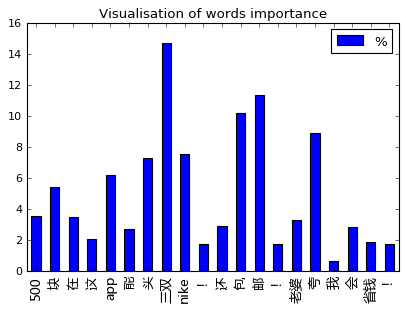

In [43]:
predict('500块在这APP能买三双NIKE！还包邮！老婆夸我会省钱！')

argmax_encode [[ 0.166798    0.23638114  0.16286018  0.07081016  0.24988987  0.10405568
   0.28651613  0.59444612  0.39301556  0.07927682  0.13037181  0.39343783
   0.444915    0.07927682  0.1428864   0.36263552  0.01181195  0.1311978
   0.06101013  0.07927682  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[1093, 520, 15, 14, 947, 52, 56, 11641, 8221, 6, 69, 66, 212, 6, 1601, 3111, 59, 103, 1144, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.166798, 0.23638114, 0.16286018, 0.070810162, 0.24988987, 0.10405568, 0.28651613, 0.59444612, 0.39301556, 0.079276815, 0.13037181, 0.39343783, 0.444915, 0.079276815, 0.1428864, 0.36263552, 0.011811946, 0.13

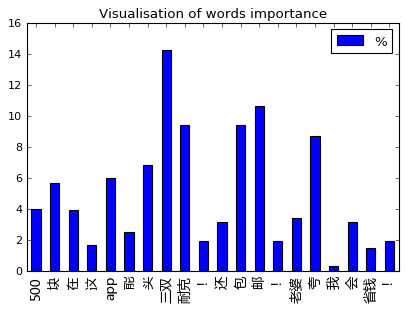

In [44]:
predict('500块在这APP能买三双耐克！还包邮！老婆夸我会省钱！')